In [208]:
import pandas as pd
import matplotlib.pyplot as plt


In [209]:
data = pd.read_csv(r'C:\Users\Dell\Desktop\Programs\Scaraping\py-scraping\Combined_csvs\final_cleaned_smartphones2.csv')

In [210]:
df = data.copy()

In [211]:
df.columns

Index(['product_name', 'rating_stars', 'number_of_reviews',
       'bought_last_month', 'discounted_mrp', 'original_mrp', 'discount%',
       'free_delivery', 'brand', 'product', 'color', 'storage_in_GB',
       'RAM_in_GB'],
      dtype='object')

## Scaling valriables to -1 to 1

```markdown
Feature	Recommended Scaling


rating_stars	    |  Min-Max Scaling

number_of_reviews   |	Standard Scaling

bought_last_month   |	Standard Scaling

original_mrp	    |  Standard Scaling

discount%	    |  Min-Max Scaling

storage_in_GB	    |  Standard Scaling

RAM_in_GB	    |  Standard Scaling


```

In [212]:
min_val = df["rating_stars"].min()
max_val = df["rating_stars"].max()

# Scale "rating_stars" to range [-1, 1]
df["rating_stars"] = -1 + (df["rating_stars"] - min_val) / (max_val - min_val) * 2
df["rating_stars"] = df["rating_stars"].round(6)

print(df["rating_stars"].min())
print(df["rating_stars"].max())

-1.0
1.0


In [213]:
means = df["number_of_reviews"].mean()
std_devs = df["number_of_reviews"].std()

# Apply manual standard scaling: (value - mean) / std
df["number_of_reviews"] = (df["number_of_reviews"] - means) / std_devs

In [214]:
means = df["bought_last_month"].mean()
std_devs = df["bought_last_month"].std()

# Apply manual standard scaling: (value - mean) / std
df["bought_last_month"] = (df["bought_last_month"] - means) / std_devs

In [215]:
means = df["original_mrp"].mean()
std_devs = df["original_mrp"].std()

# Apply manual standard scaling: (value - mean) / std
df["original_mrp"] = (df["original_mrp"] - means) / std_devs

In [216]:
min_val = df["discount%"].min()
max_val = df["discount%"].max()

# Scale "discount%" to range [-1, 1]
df["discount%"] = -1 + (df["discount%"] - min_val) / (max_val - min_val) * 2
df["discount%"] = df["discount%"].round(6)

print(df["discount%"].min())
print(df["discount%"].max())

-1.0
1.0


In [217]:
means = df["storage_in_GB"].mean()
std_devs = df["storage_in_GB"].std()

# Apply manual standard scaling: (value - mean) / std
df["storage_in_GB"] = (df["storage_in_GB"] - means) / std_devs

In [218]:
means = df["RAM_in_GB"].mean()
std_devs = df["RAM_in_GB"].std()

# Apply manual standard scaling: (value - mean) / std
df["RAM_in_GB"] = (df["RAM_in_GB"] - means) / std_devs

In [219]:
df.head()

,product_name,rating_stars,number_of_reviews,bought_last_month,discounted_mrp,original_mrp,discount%,free_delivery,brand,product,color,storage_in_GB,RAM_in_GB
0,Apple iPhone 15 () -,0.75,-0.177400,-0.287376,65900.0,0.471377,-0.446154,0,apple,iPhone 15,Green,-0.658974,-0.653572
1,Apple iPhone 15 () - Pink,0.70,-0.177676,-0.370727,65900.0,0.464980,-0.476923,0,apple,iPhone 15,Pink,-0.658974,-0.653572
2,Apple iPhone 13 () - Starlight,0.75,0.347235,3.713474,45490.0,0.044889,-0.261538,0,apple,iPhone 13,Starlight,-0.658974,-0.653572
3,Apple iPhone 13 () - Midnight,0.75,0.264074,3.713474,45490.0,0.038491,-0.261538,0,apple,iPhone 13,Midnight,-0.658974,-0.653572
4,Apple iPhone 13 () - Pink,0.75,0.024048,3.713474,45490.0,0.044889,-0.261538,0,apple,iPhone 13,Pink,-0.658974,-0.653572


> NOW encoding the categorical variables

> Categorical variables are : brand and color

```markdown
Both are encoded using one hot encoding as the are **nominal** variables
```

In [220]:
df.drop(["product_name","product","discounted_mrp"],axis=1,inplace=True)
df.columns

Index(['rating_stars', 'number_of_reviews', 'bought_last_month',
       'original_mrp', 'discount%', 'free_delivery', 'brand', 'color',
       'storage_in_GB', 'RAM_in_GB'],
      dtype='object')

In [221]:
df["brand"].value_counts()

brand
apple      115
samsung     68
vivo        50
redmi       46
oneplus     45
oppo        41
realme      41
xiaomi      30
iphone      14
Name: count, dtype: int64

In [222]:
df = pd.get_dummies(df, columns=['brand'], prefix='brand')
df.head()

,rating_stars,number_of_reviews,bought_last_month,original_mrp,discount%,free_delivery,color,storage_in_GB,RAM_in_GB,brand_apple,brand_iphone,brand_oneplus,brand_oppo,brand_realme,brand_redmi,brand_samsung,brand_vivo,brand_xiaomi
0,0.75,-0.177400,-0.287376,0.471377,-0.446154,0,Green,-0.658974,-0.653572,True,False,False,False,False,False,False,False,False
1,0.70,-0.177676,-0.370727,0.464980,-0.476923,0,Pink,-0.658974,-0.653572,True,False,False,False,False,False,False,False,False
2,0.75,0.347235,3.713474,0.044889,-0.261538,0,Starlight,-0.658974,-0.653572,True,False,False,False,False,False,False,False,False
3,0.75,0.264074,3.713474,0.038491,-0.261538,0,Midnight,-0.658974,-0.653572,True,False,False,False,False,False,False,False,False
4,0.75,0.024048,3.713474,0.044889,-0.261538,0,Pink,-0.658974,-0.653572,True,False,False,False,False,False,False,False,False


In [223]:
df["color"].value_counts()

color
Black               159
Blue                 65
Green                49
Red                  37
White                26
Pink                 17
Silver               13
Yellow               10
Natural Titanium      9
Gold                  8
Midnight              8
Starlight             8
Gray                  7
Purple                7
Teal                  5
White Titanium        5
Ultramarine           5
Black Titanium        4
Blue Titanium         3
Space Black           2
Desert Titanium       1
Graphite              1
Pacific Blue          1
Name: count, dtype: int64

In [224]:
df = pd.get_dummies(df, columns=['color'], prefix='color')
df.head()

,rating_stars,number_of_reviews,bought_last_month,original_mrp,discount%,free_delivery,storage_in_GB,RAM_in_GB,brand_apple,brand_iphone,...,color_Purple,color_Red,color_Silver,color_Space Black,color_Starlight,color_Teal,color_Ultramarine,color_White,color_White Titanium,color_Yellow
0,0.75,-0.177400,-0.287376,0.471377,-0.446154,0,-0.658974,-0.653572,True,False,...,False,False,False,False,False,False,False,False,False,False
1,0.70,-0.177676,-0.370727,0.464980,-0.476923,0,-0.658974,-0.653572,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0.75,0.347235,3.713474,0.044889,-0.261538,0,-0.658974,-0.653572,True,False,...,False,False,False,False,True,False,False,False,False,False
3,0.75,0.264074,3.713474,0.038491,-0.261538,0,-0.658974,-0.653572,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0.75,0.024048,3.713474,0.044889,-0.261538,0,-0.658974,-0.653572,True,False,...,False,False,False,False,False,False,False,False,False,False


In [225]:
df.columns

Index(['rating_stars', 'number_of_reviews', 'bought_last_month',
       'original_mrp', 'discount%', 'free_delivery', 'storage_in_GB',
       'RAM_in_GB', 'brand_apple', 'brand_iphone', 'brand_oneplus',
       'brand_oppo', 'brand_realme', 'brand_redmi', 'brand_samsung',
       'brand_vivo', 'brand_xiaomi', 'color_Black', 'color_Black Titanium',
       'color_Blue', 'color_Blue Titanium', 'color_Desert Titanium',
       'color_Gold', 'color_Graphite', 'color_Gray', 'color_Green',
       'color_Midnight', 'color_Natural Titanium', 'color_Pacific Blue',
       'color_Pink', 'color_Purple', 'color_Red', 'color_Silver',
       'color_Space Black', 'color_Starlight', 'color_Teal',
       'color_Ultramarine', 'color_White', 'color_White Titanium',
       'color_Yellow'],
      dtype='object')

In [226]:
cols_to_convert = ['brand_apple','brand_iphone','brand_oneplus','brand_oppo', 'brand_realme', 'brand_redmi', 'brand_samsung','brand_vivo', 'brand_xiaomi', 'color_Black', 'color_Black Titanium','color_Blue', 'color_Blue Titanium', 'color_Desert Titanium','color_Gold', 'color_Graphite', 'color_Gray', 'color_Green','color_Midnight', 'color_Natural Titanium', 'color_Pacific Blue','color_Pink', 'color_Purple', 'color_Red', 'color_Silver','color_Space Black','color_Starlight', 'color_Teal','color_Ultramarine', 'color_White', 'color_White Titanium','color_Yellow']

df[cols_to_convert] = df[cols_to_convert].astype(int)
df[cols_to_convert].dtypes

df.head()

,rating_stars,number_of_reviews,bought_last_month,original_mrp,discount%,free_delivery,storage_in_GB,RAM_in_GB,brand_apple,brand_iphone,...,color_Purple,color_Red,color_Silver,color_Space Black,color_Starlight,color_Teal,color_Ultramarine,color_White,color_White Titanium,color_Yellow
0,0.75,-0.177400,-0.287376,0.471377,-0.446154,0,-0.658974,-0.653572,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.70,-0.177676,-0.370727,0.464980,-0.476923,0,-0.658974,-0.653572,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.75,0.347235,3.713474,0.044889,-0.261538,0,-0.658974,-0.653572,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.75,0.264074,3.713474,0.038491,-0.261538,0,-0.658974,-0.653572,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.75,0.024048,3.713474,0.044889,-0.261538,0,-0.658974,-0.653572,1,0,...,0,0,0,0,0,0,0,0,0,0


In [227]:
df.shape

(450, 40)

In [228]:
df[df["rating_stars"] < 0].shape

(16, 40)

In [229]:
df[df["discount%"] < 0].shape

(375, 40)

In [230]:
df["free_delivery"].replace(0, -1, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_15148\880343166.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["free_delivery"].replace(0, -1, inplace=True)


In [231]:
df.columns

Index(['rating_stars', 'number_of_reviews', 'bought_last_month',
       'original_mrp', 'discount%', 'free_delivery', 'storage_in_GB',
       'RAM_in_GB', 'brand_apple', 'brand_iphone', 'brand_oneplus',
       'brand_oppo', 'brand_realme', 'brand_redmi', 'brand_samsung',
       'brand_vivo', 'brand_xiaomi', 'color_Black', 'color_Black Titanium',
       'color_Blue', 'color_Blue Titanium', 'color_Desert Titanium',
       'color_Gold', 'color_Graphite', 'color_Gray', 'color_Green',
       'color_Midnight', 'color_Natural Titanium', 'color_Pacific Blue',
       'color_Pink', 'color_Purple', 'color_Red', 'color_Silver',
       'color_Space Black', 'color_Starlight', 'color_Teal',
       'color_Ultramarine', 'color_White', 'color_White Titanium',
       'color_Yellow'],
      dtype='object')

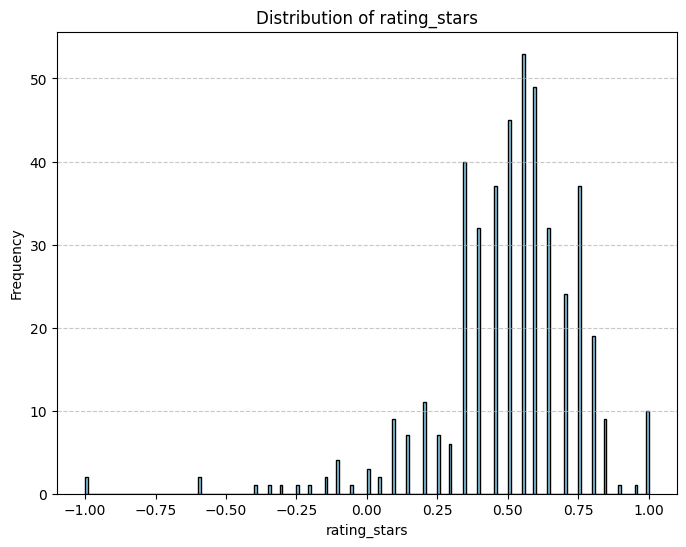

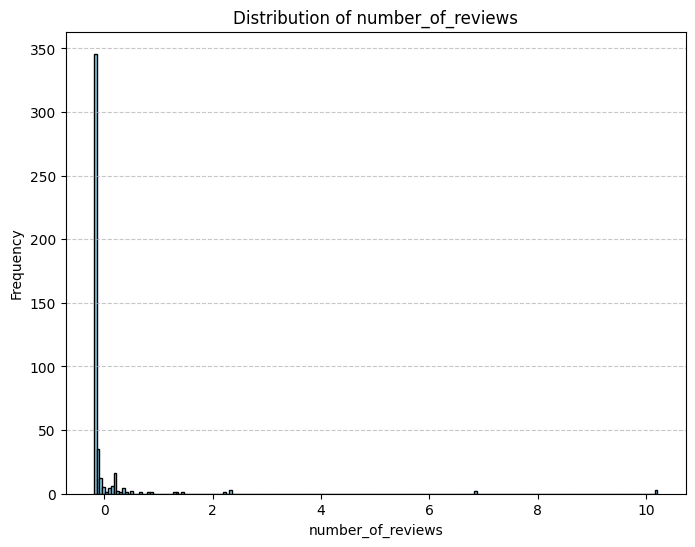

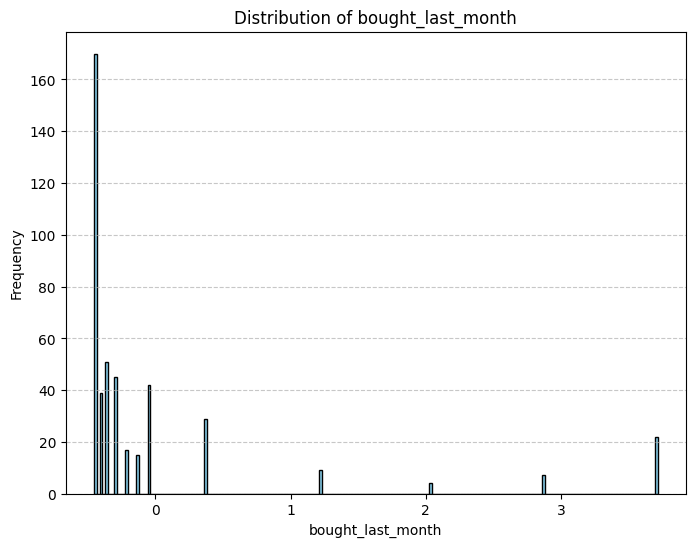

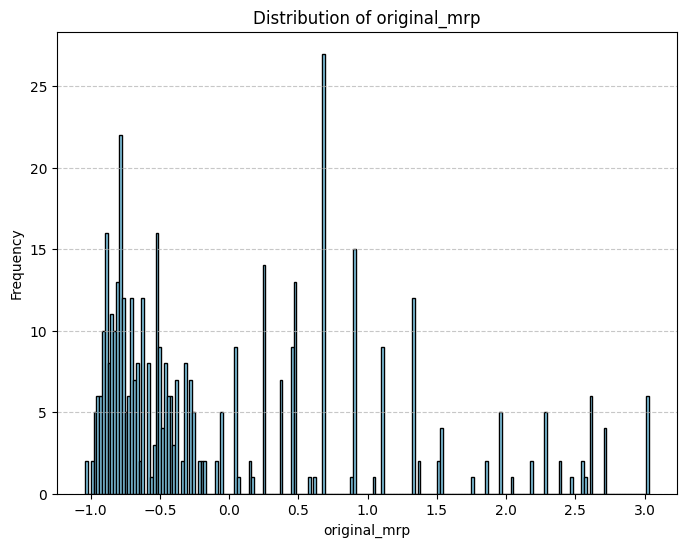

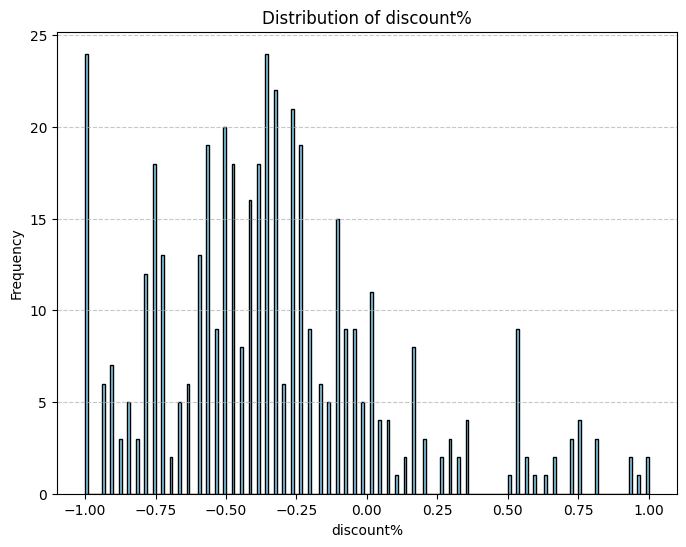

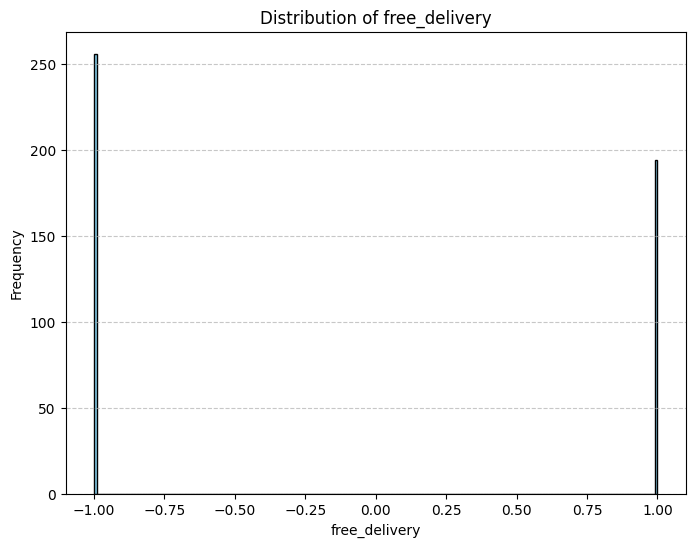

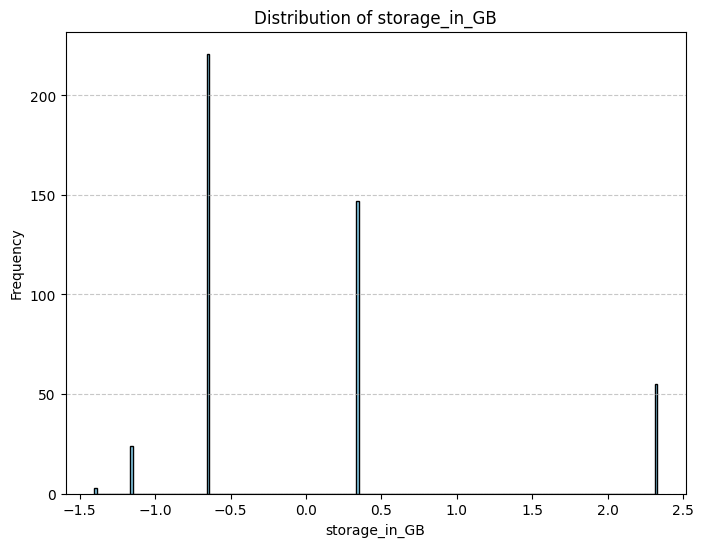

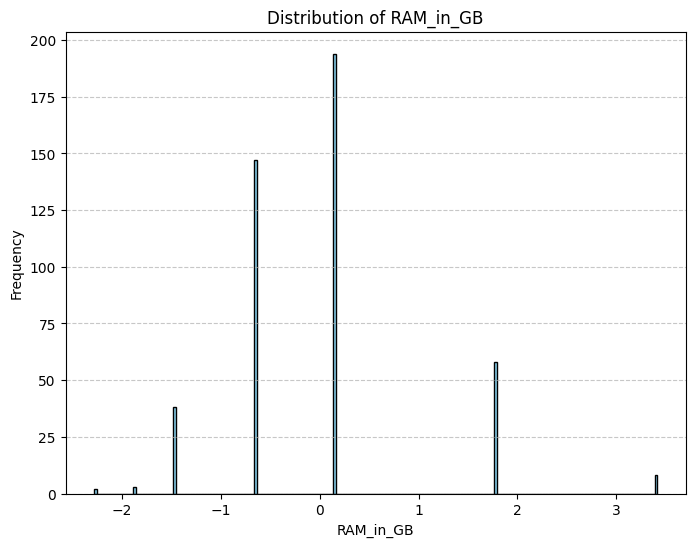

In [232]:
for col in ['rating_stars', 'number_of_reviews', 'bought_last_month','original_mrp', 'discount%', 'free_delivery', 'storage_in_GB','RAM_in_GB']:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=200, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()